In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [24]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
input_shape = (224, 224, 3)
num_classes = 4
batch_size = 32

In [27]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

resnet_model = Model(inputs=base_model.input, outputs=predictions)

resnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_path = '/content/drive/MyDrive/Colab Notebooks/data splitted/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/data splitted/val'

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3147 images belonging to 4 classes.
Found 1051 images belonging to 4 classes.


In [30]:
  base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [32]:
epochs = 10
history = resnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)


Epoch 1/10
98/98 [==============================] - 856s 9s/step - loss: 1.0954 - accuracy: 0.5522 - val_loss: 1.0769 - val_accuracy: 0.5420
Epoch 2/10
98/98 [==============================] - 935s 9s/step - loss: 1.0344 - accuracy: 0.5637 - val_loss: 0.9193 - val_accuracy: 0.5762
Epoch 3/10
98/98 [==============================] - 849s 9s/step - loss: 0.9896 - accuracy: 0.5657 - val_loss: 0.8760 - val_accuracy: 0.6309
Epoch 4/10
98/98 [==============================] - 908s 9s/step - loss: 0.9201 - accuracy: 0.6135 - val_loss: 0.9079 - val_accuracy: 0.5557
Epoch 5/10
98/98 [==============================] - 942s 10s/step - loss: 0.8815 - accuracy: 0.6234 - val_loss: 0.7939 - val_accuracy: 0.6865
Epoch 6/10
98/98 [==============================] - 843s 9s/step - loss: 0.8533 - accuracy: 0.6411 - val_loss: 0.7698 - val_accuracy: 0.6934
Epoch 7/10
98/98 [==============================] - 842s 9s/step - loss: 0.8222 - accuracy: 0.6626 - val_loss: 0.7660 - val_accuracy: 0.6826
Epoch 8/10
9

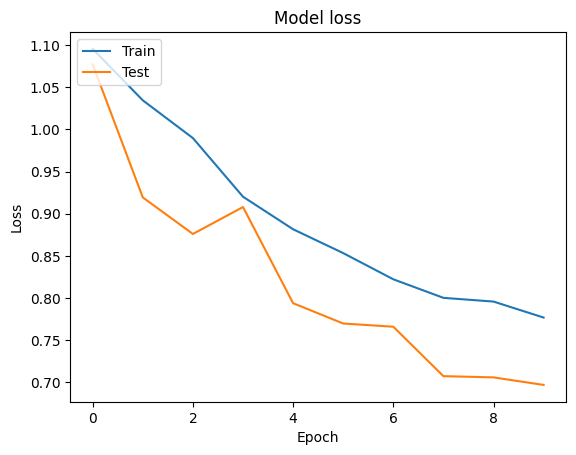

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()